## Dataset exploration

In [18]:
from thesis import SAVED_RESULTS_PATH
import os
import matplotlib.pyplot as plt
from thesis.datasets import NaultPipeline
import scanpy as sc


FIGURES_PATH = SAVED_RESULTS_PATH / "figures"
os.makedirs(FIGURES_PATH, exist_ok=True)


### Nault

In [4]:
nault = NaultPipeline()
nault_data = nault.dataset
nault_data.obs['Dose'] = nault_data.obs['Dose'].astype('category')

Preprocessing started
Preprocessing finished


/tmp/ipykernel_1050594/3968683631.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  nault_data.obs['Dose'] = nault_data.obs['Dose'].astype('category')


In [39]:
sc.pp.pca(nault_data)
sc.pp.neighbors(nault_data)
sc.tl.umap(nault_data)


/g/kreshuk/katzalis/conda/miniforge3/envs/thesis/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


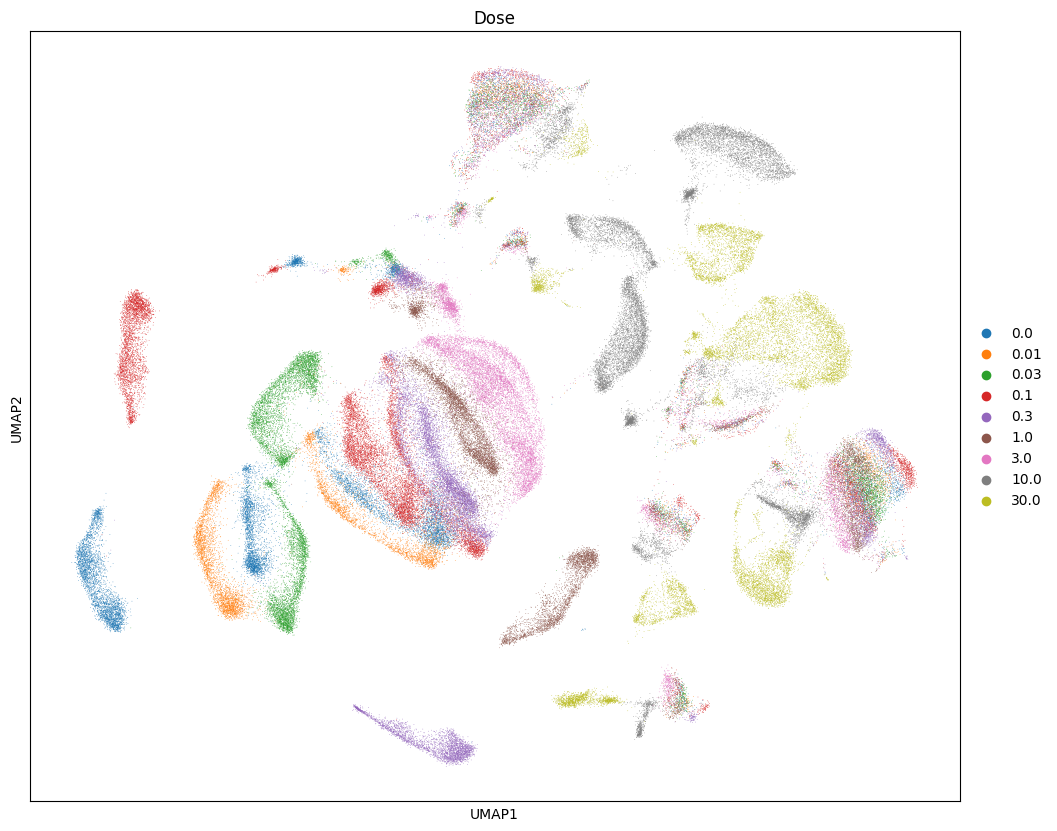

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
sc.pl.umap(nault_data, color=['Dose'], show=False, ax=ax)
plt.savefig(FIGURES_PATH / 'nault_dose_umap.png', dpi=300, bbox_inches='tight')
#plt.savefig(FIGURES_PATH / 'nault_dose_umap_600.png', dpi=600, bbox_inches='tight')
#plt.savefig(FIGURES_PATH / 'nault_dose_umap_150.png', dpi=150, bbox_inches='tight')
plt.show()

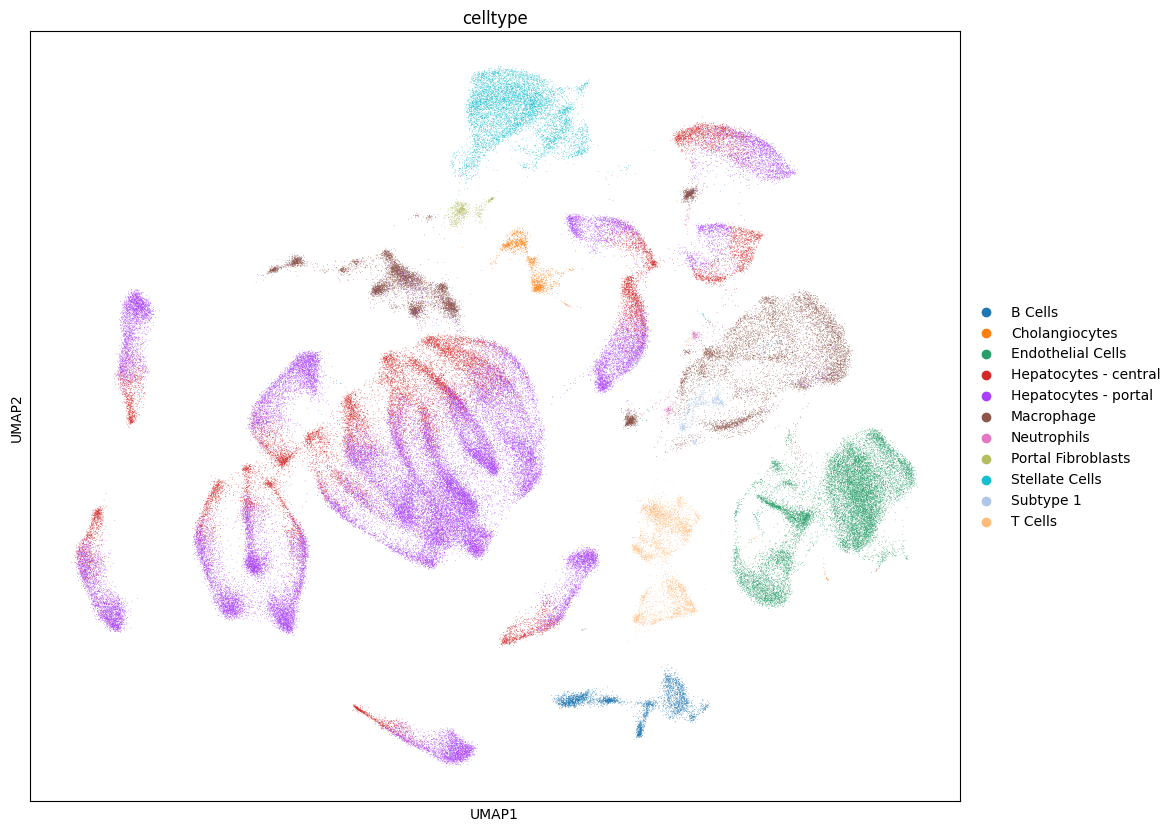

In [41]:
fig, ax = plt.subplots(figsize=(12, 10))
sc.pl.umap(nault_data, color=['celltype'], show=False, ax=ax)
plt.savefig(FIGURES_PATH / 'nault_cell_umap.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_1050594/2648188253.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_1050594/2648188253.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_1050594/2648188253.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_1050594/2648188253.py:22: FutureWarning: The default of observed=False is deprecated 

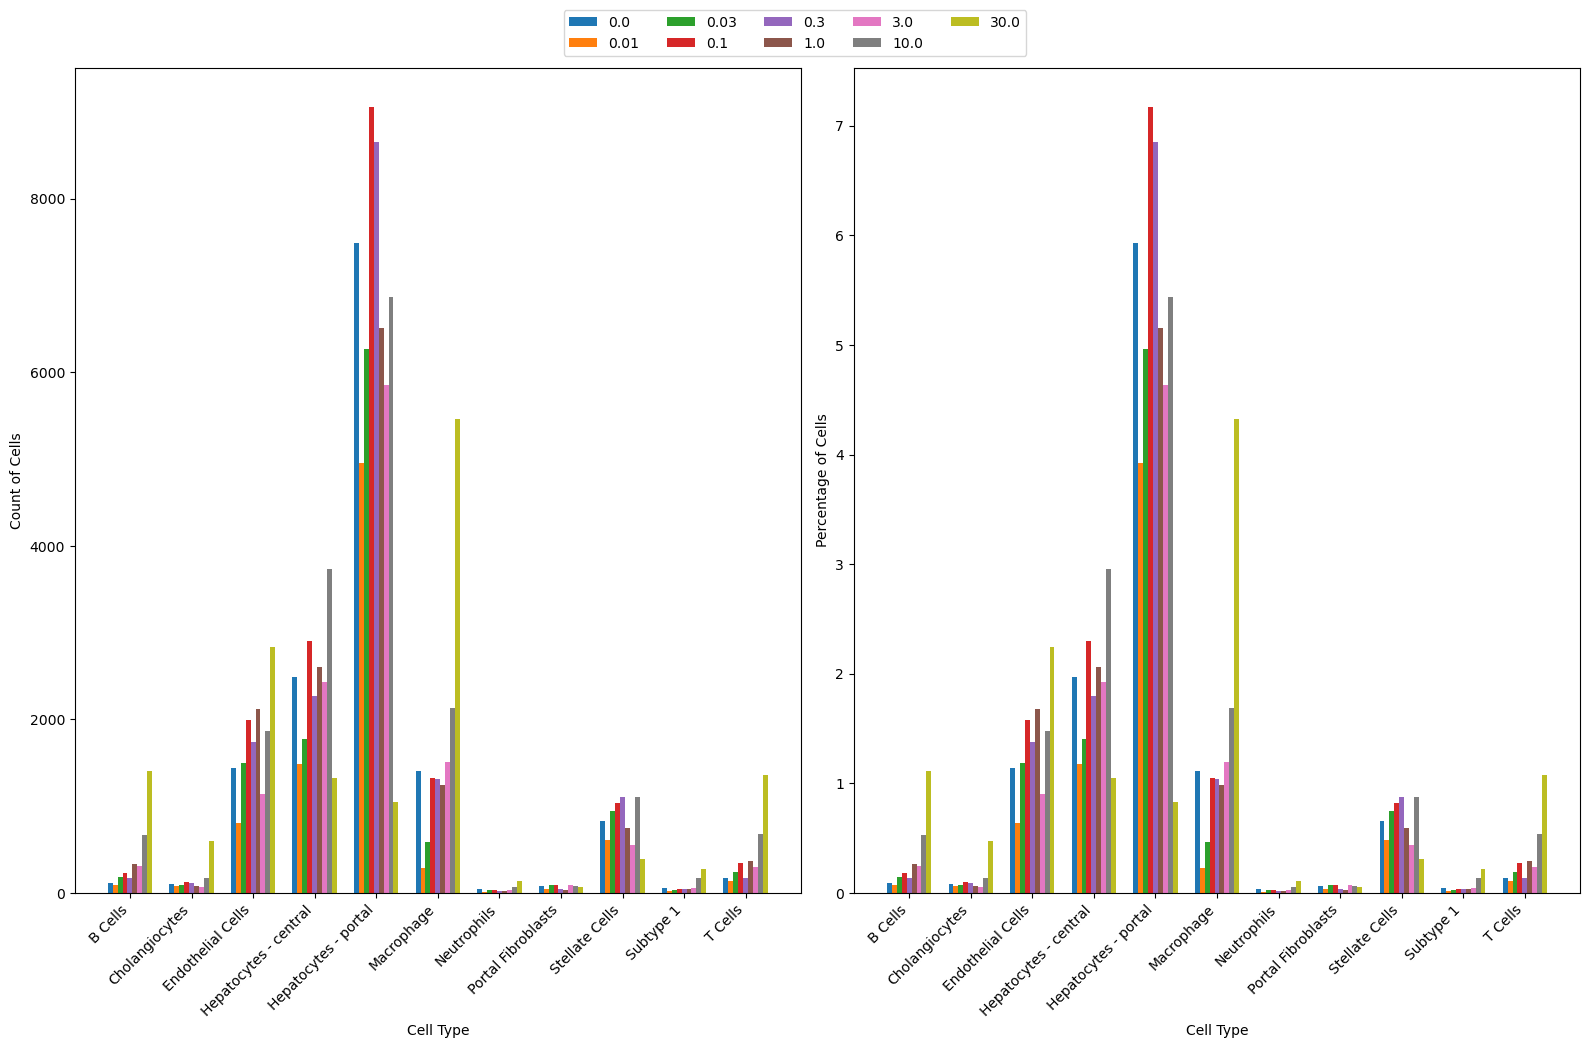

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(16, 10)) 
ax = ax.flatten()

width = 0.08 

nault_df = nault_data.obs.sort_values("celltype")

total_count = len(nault_data)

cell_types = nault_df["celltype"].unique().tolist()
dosages = sorted(nault_df["Dose"].unique().tolist())  # Ensure dosages are in order

x = np.arange(len(cell_types))  # Positions for each cell type

def plot_cell_types(ax, ylabel: str, with_percentage: bool = False):
    for i, dosage in enumerate(dosages):
        perturb = (
            nault_df[nault_df["Dose"] == dosage]
            .groupby("celltype")
            .size()
            .tolist()
        )
        
        if with_percentage:
            perturb = [100 * x / total_count for x in perturb]

        ax.bar(x - width * 4 + i * width, perturb, width, label=f"{dosage}")

        ax.set_xticks(x)
        ax.set_xticklabels(cell_types, rotation=45, ha="right")
        ax.set_xlabel("Cell Type")
        ax.set_ylabel(ylabel)
        #ax.set_title("Control vs Stimulated Condition Counts by Cell Type")

plot_cell_types(ax[0], ylabel='Count of Cells')
plot_cell_types(ax[1], ylabel='Percentage of Cells', with_percentage=True)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=5)


plt.tight_layout()
plt.savefig(FIGURES_PATH / 'nault_dosages_counts.pdf', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_1050594/1991219894.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Dose")
/tmp/ipykernel_1050594/1991219894.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Dose")
/tmp/ipykernel_1050594/1991219894.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Dose")
/tmp/ipykernel_1050594/1991219894.py:22: FutureWarning: The default of observed=False is deprecated and will be 

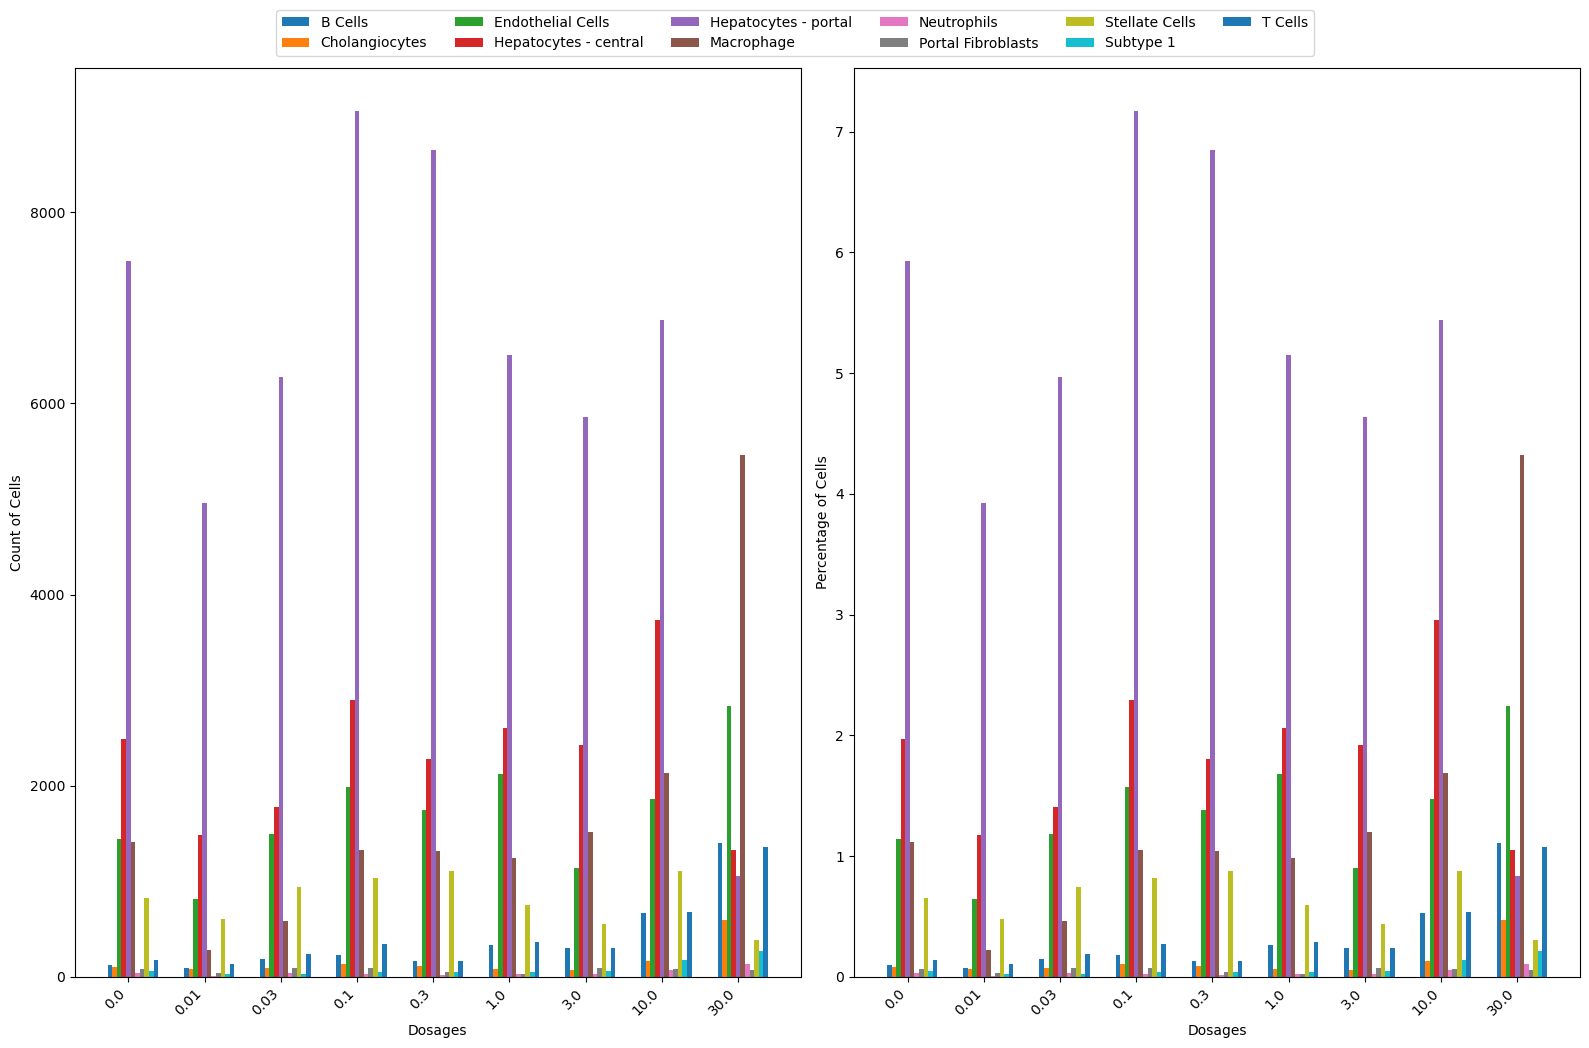

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(16, 10)) 
ax = ax.flatten()

width = 0.06 

nault_df = nault_data.obs.sort_values("celltype")

total_count = len(nault_data)

cell_types = nault_df["celltype"].unique().tolist()
dosages = sorted(nault_df["Dose"].unique().tolist())  # Ensure dosages are in order

x = np.arange(len(dosages))  # Positions for each cell type

def plot_cell_types(ax, ylabel: str, with_percentage: bool = False):
    for i, cell_type in enumerate(cell_types):
        perturb = (
            nault_df[nault_df["celltype"] == cell_type]
            .groupby("Dose")
            .size()
            .tolist()
        )
        
        if with_percentage:
            perturb = [100 * x / total_count for x in perturb]

        ax.bar(x - width * 4 + i * width, perturb, width, label=f"{cell_type}")

        ax.set_xticks(x)
        ax.set_xticklabels(dosages, rotation=45, ha="right")
        ax.set_xlabel("Dosages")
        ax.set_ylabel(ylabel)
        #ax.set_title("Control vs Stimulated Condition Counts by Cell Type")

plot_cell_types(ax[0], ylabel='Count of Cells')
plot_cell_types(ax[1], ylabel='Percentage of Cells', with_percentage=True)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=6)


plt.tight_layout()
plt.savefig(FIGURES_PATH / 'nault_cell_types_counts.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [43]:
nault_data[nault_data.obs['celltype'] == 'Hepatocytes - portal'].obs.groupby('Dose').size()

Dose
0.00     7492
0.01     4955
0.03     6271
0.10     9056
0.30     8651
1.00     6511
3.00     5860
10.00    6869
30.00    1052
dtype: int64

### Pbmc

In [44]:
from thesis.datasets import PbmcPipeline
import scanpy as sc

pbmc = PbmcPipeline()
pbmc_data = pbmc.dataset

In [45]:
sc.pp.pca(pbmc_data)
sc.pp.neighbors(pbmc_data)
sc.tl.umap(pbmc_data)

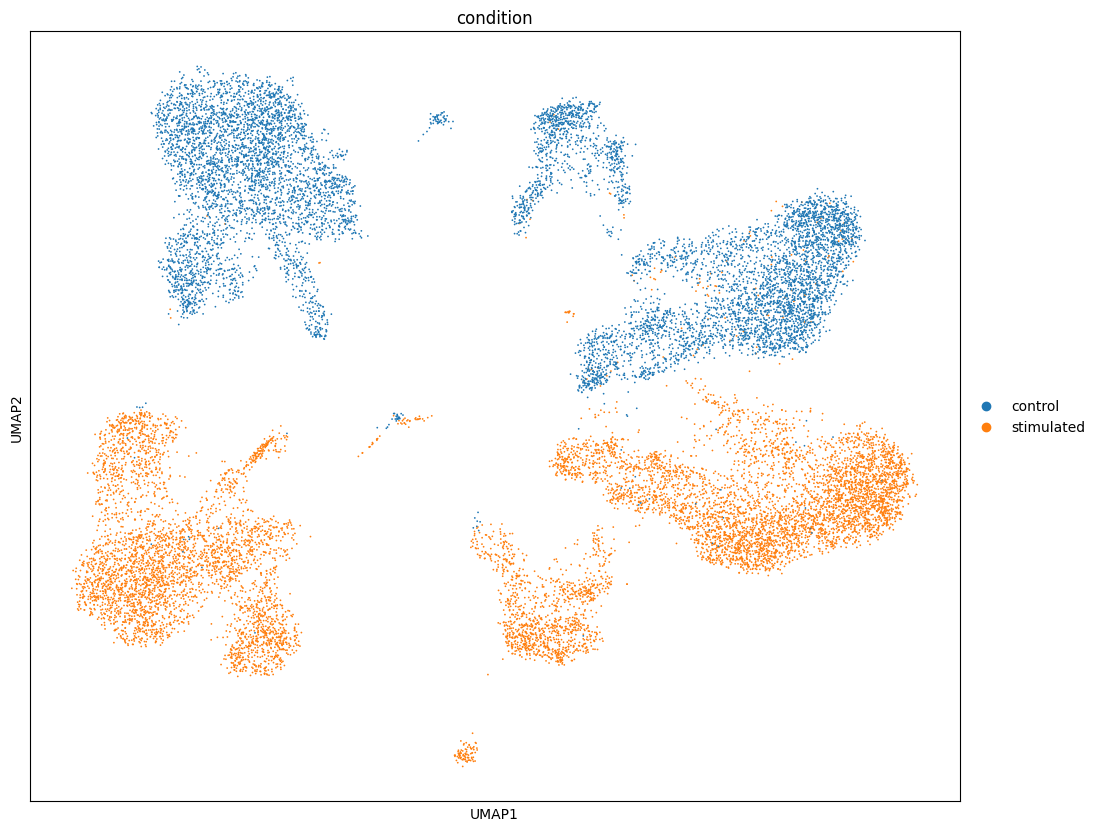

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))
sc.pl.umap(pbmc_data, color=['condition'], show=False, ax=ax)
plt.savefig(FIGURES_PATH / 'pbmc_condtion_umap.png', dpi=300, bbox_inches='tight')
plt.show()

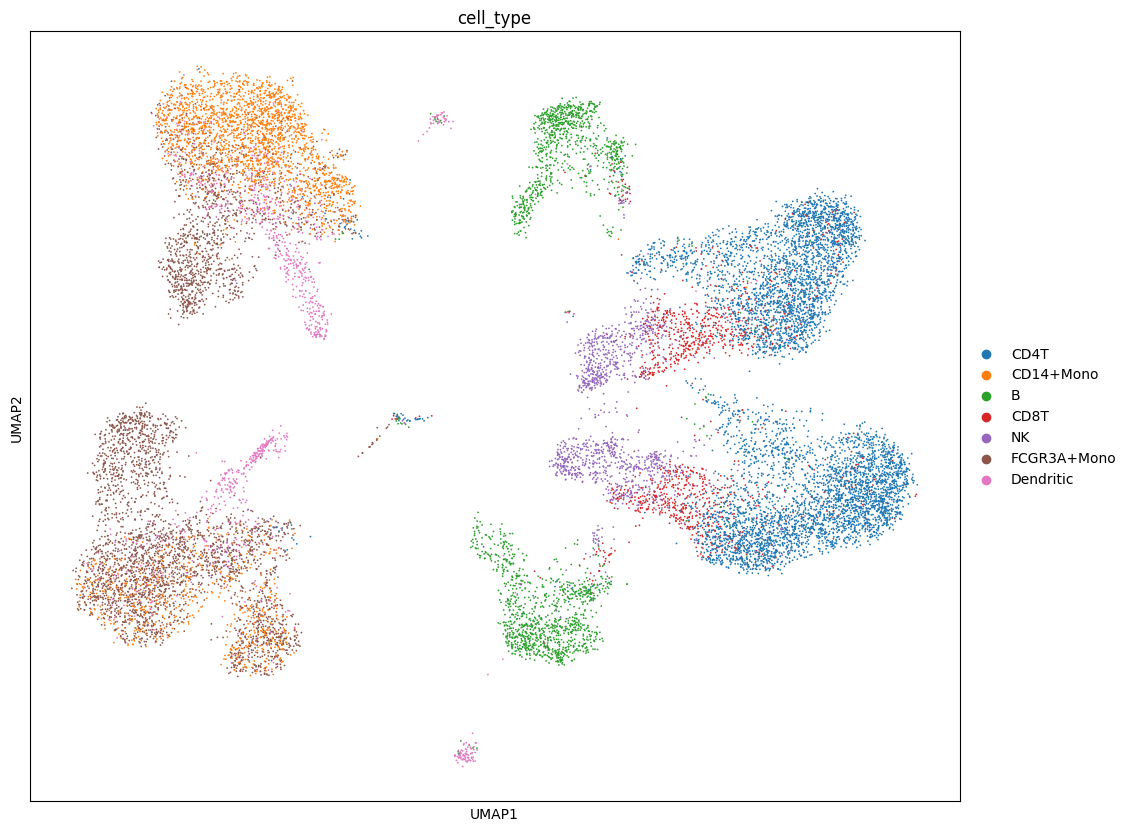

In [47]:
fig, ax = plt.subplots(figsize=(12, 10))
sc.pl.umap(pbmc_data, color=['cell_type'], show=False, ax=ax)
plt.savefig(FIGURES_PATH / 'pbmc_cell_umap.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_1758636/1762650016.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("cell_type")
/tmp/ipykernel_1758636/1762650016.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("cell_type")


<Figure size 1000x1000 with 0 Axes>

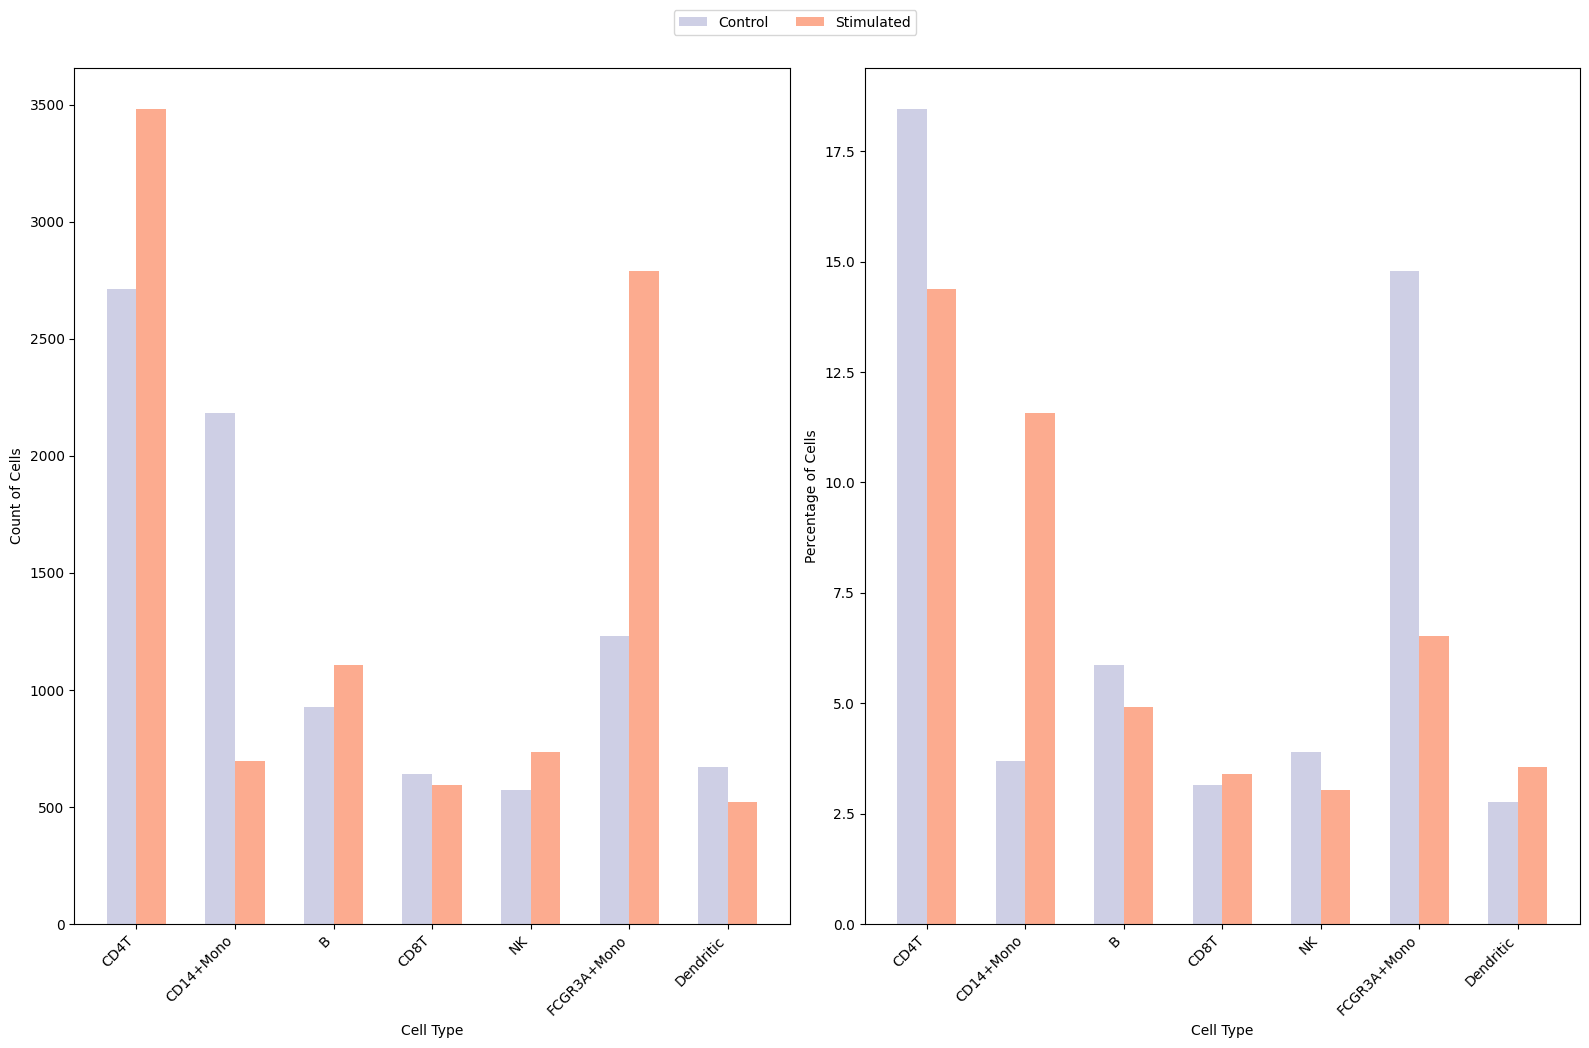

In [48]:
## how many control and perturb per cell type?
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))

fig, axes = plt.subplots(1, 2, figsize=(16, 10))
axes = axes.flatten()

width = 0.3

pbmc_data_df = pbmc_data.obs.sort_values("cell_type")

total_count = len(pbmc_data)

cell_types = pbmc_data_df["cell_type"].unique().tolist()

control = np.array(
    pbmc_data_df[pbmc_data_df["condition"] == "control"]
    .groupby("cell_type")
    .size()
    .tolist()
)
perturb = np.array(
    pbmc_data_df[pbmc_data_df["condition"] == "stimulated"]
    .groupby("cell_type")
    .size()
    .tolist()
)

x = np.arange(len(cell_types))


def plot(ax, control, perturb, ylabel):
    ax.bar(x - width / 2, control, width, label="Control", color=plt.cm.Purples(0.3))
    ax.bar(x + width / 2, perturb, width, label="Stimulated", color=plt.cm.Reds(0.3))

    ax.set_xlabel("Cell Type")
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(cell_types, rotation=45, ha="right")


plot(axes[0], control, perturb, ylabel='Count of Cells')
control = control / total_count * 100
perturb = perturb / total_count * 100
plot(axes[1], perturb, control, ylabel='Percentage of Cells')
    # plt.title("Control vs Stimulated Condition Counts by Cell Type")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.tight_layout()
fig.savefig(FIGURES_PATH / "pbmc_counts.pdf", dpi=300, bbox_inches="tight")
plt.show()